В заметке "выбор наилучшего порога логистической регрессии" было показано, что в для задач медицинского прогнозирования логистическая регрессия является хорошим инструментом, так как имеет высокий показалеть площади под ROC кривой (больше 0.8).

Целью этой заметки является сравнение качества предсказаний других методов в задачах медицинского прогнозирования. Рассматривается 4 популярных классификатора: дерево решений, метод опорных векторов, метод стахостического градиентного спуска и метод многослойного перцептрона.

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

In [50]:
#загрузим данные о пациентах c диабетом
data = pd.read_csv('C:/Users/olga/Downloads/diabetes.csv', index_col = 0)
# X - матрица индивидуальных характеристик, y - вектор вида [1, -1], где 1 - болен, -1 - здоров
X, y = data.iloc[:,:-1].values, data.iloc[:, -1]

In [105]:
#классификатор "дерево решений"
def tree(X,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    return clf.predict(x_test), y_test


In [107]:
#классификатор "метод опорных векторов"
def SVM(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC()
    clf.fit(X_train, y_train)
    return clf.predict(X_test), y_test
    

In [108]:
#классификация методом стахостического градиентного спуска
def SGD(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = linear_model.SGDClassifier()
    clf.fit(X_train, y_train)
    return clf.predict(X_test), y_test

In [109]:
#классификация перцептроном
def MLPC(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = neural_network.MLPClassifier( )
    clf.fit(X_train, y_train)
    return clf.predict(X_test), y_test

In [68]:
# считаем площадь под ROC кривой
def roc_AUC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    return metrics.auc(fpr, tpr)

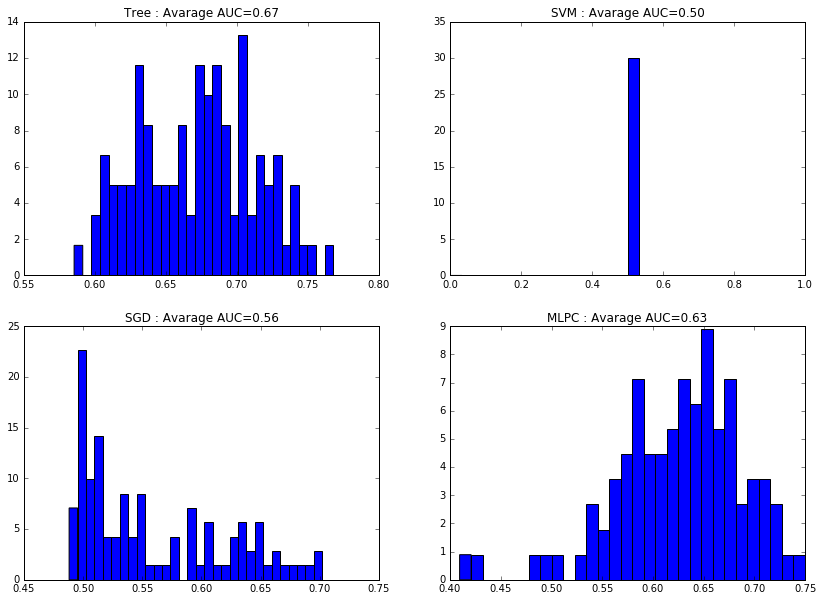

In [125]:
plt.figure(figsize=(14,10))
clf_names=['Tree','SVM','SGD','MLPC']
#построем гистограммы распределения ROC-AUC для разных методов классификации
AUC=[[],[],[],[]]
for j in range(1,100):
    A = tree(X,y)       
    AUC[0].append(roc_AUC(A[1],A[0]))
for j in range(1,100):
    A = SVM(X,y)       
    AUC[1].append(roc_AUC(A[1],A[0]))  
for j in range(1,100):
    A = SGD(X,y)       
    AUC[2].append(roc_AUC(A[1],A[0]))
for j in range(1,100):
    A = MLPC(X,y)       
    AUC[3].append(roc_AUC(A[1],A[0])) 
ans = pd.DataFrame(data=AUC)   
for i in range(1,5):
    plt.subplot(2,2, i)
    plt.title(clf_names[i-1]+' : Avarage AUC={0:0.2f}'.format(np.mean(AUC[i-1])))
    plt.hist(AUC[i-1], 30, normed=True)


Таким образом, все рассмотренные методы имеют более низкое значение ROC-AUC, чем логистическая регрессия, поэтому она является наиболее валидным инструментом в задачах медицинского прогнозирования.

P.S. стоит рассмтортить различные значения параметров для описанных выше методов, чтобы повысить качество вывода.